# Exploratory Data Analysis of Boston Housing Dataset

### Author Name: Shobhit Kulshreshtha

#### NOTE: Activity is done purely for self practice and enhace recently gained data visualization skills and does not hold any commercial value.

## Objectives of this Project:


<b>

> Objective 1.1: To study effects of various variables on house prices
    
> Objective 1.2: Identification and Pattern Study of Variables significantly affecting House Prices:
    
        -- Direct Proportionality
    
        -- Inverse Proportionality

> Objective 2: Price Range predictions using regression line

> Objective 3: Holistic Linear Regression Machine Learning Model Development to Predict House Prices
    
> Objective 4.1: Understanding housing preferences of "Customer Segment": People of Color ("Assuming" the study is done for a real estate business).
    
> Objective 4.2: Understanding housing preferences of "Customer Segment": People from Lower Strata of Society ("Assuming" the study is done for a real estate business).
    
> Objective 4.3: Brief Exploratory Study of Intervariable Dependencies

## Methodology:

> Dataset acquired from sklearn

> Dataset converted to Pandas Dataframe

> Extensive usage of Python Libraries: Pandas and Numpy to manage the data.

> Includes "splashes" of "Pure Vanilla Python" algorithms to manage data in DataFrames, N-Dimensional Arrays, and generate visualizations.

> For visualization, Python Libraries: Matplotlib, Seaborn and Plotly is used. Usage of Plotly was limited. More focus has been on Seaborn.

> Data File acquired from sklearn.datasets, was in pickle format and hence, pickle was also imported.

> Every visualization includes Observations made by researcher.

> Entire project has been made in Jupyter Notebook.

> Project starts with a broad overview of all data points and slowly focuses on specific variables based on the deliverables of Objectives in every section.

> Though Machine Learning algorithm has been used briefly, however, the project mainly focuses on Visualizations and Exploratory Data Analysis rather then focusing on Model Development and Price Prediction.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from plotly.offline import iplot
import cufflinks as cf
import pickle as pkl      ## Since the datafile is in .pkl format
py.offline.init_notebook_mode(connected= True)     ## To enable plotly to work in offline mode
cf.go_offline()
%matplotlib inline

## Loading Data:

Data Source: pkl format data from sklearn datasets

In [2]:
from sklearn.datasets import load_boston

boston= load_boston()

## Understanding Data:

### Data Glimpse

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

<b> Observations in File:
 
 -- Data is in dictionary form
 
 -- We will start to observe and prepare data for analysis starting with accessing the dictionary keys

### Observing the Data File and formulating visualization strategies

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

#### Observing each key:

In [5]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print("Features identified:".title())
print(boston["DESCR"][295:1226])

Features Identified:

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


In [7]:
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
boston["target"]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

<b> Observations:</b>
    
> 14 variables were noticed in the data. All the variables have been explained above in attribute information in key "DESCR".
    
> Objective's target data is Price of the house which is not available in "data" key and has been seperately stored under "target" key
    
> The researcher will access the feature variables from boston["data"], column names of feature variables from boston["feature_names] key and target value of "House Prices" from boston["target"] key. 
    
> All these columns will then be merged together to form a Pandas DataFRame for ease of reference and agility with visualization tools such as Seaborn, Matplotlib. Apart from Pandas, researcher will also use the Numpy library wherever required.

> Alongwith the usage of static visualization tools as described above, the reseracher shall also render visualizations in Plotly for online report generation in future.

## DataFrame Preperation

In [10]:
boston_data= pd.DataFrame(data= boston["data"], columns= boston["feature_names"])   ## Preparing basic DF
boston_data["Price"]= boston["target"]                                              ## Merging "Price" column

boston_data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

### DataFrame Integrity Check

In [11]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
boston_data["CHAS"].nunique()

2

<b> Observations:</b>
    
> 13 variables transferred to Pandas DataFrame.
    
> Target variable of "Price" merged with the same DataFrame.
    
> "CHAS" refers to "Yes" OR "No" and hence is a categorical value. This would've ideally been needs to be converted as "Categorical" to optimize the memory
    
> All the Float values will be converted to 32 bits to optimize memory.
    
> Data is found to be extremely well articulated with NO Null values and hence Null Value Treatments will not be required.

### Memory Optimization

In [13]:
for heading in boston_data.columns:
    boston_data[heading]= boston_data[heading].astype("float32")       ## Converting all VARs to float32 bit

In [14]:
boston_data["CHAS"]= boston_data["CHAS"].astype("category")            ## Changing CHAS to CATEGORY

In [15]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float32 
 1   ZN       506 non-null    float32 
 2   INDUS    506 non-null    float32 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float32 
 5   RM       506 non-null    float32 
 6   AGE      506 non-null    float32 
 7   DIS      506 non-null    float32 
 8   RAD      506 non-null    float32 
 9   TAX      506 non-null    float32 
 10  PTRATIO  506 non-null    float32 
 11  B        506 non-null    float32 
 12  LSTAT    506 non-null    float32 
 13  Price    506 non-null    float32 
dtypes: category(1), float32(13)
memory usage: 26.4 KB


<b> Observations:</b>
    
> Although memory consumption from boston_data was just 55.5 KB, researcher still decided to go ahead with further optimization to ensure the process integrity.
    
> Hence, the dataset size was reduced from 55.5 KB to 26.4 KB (A reduction of almost 50%) which would've been otherwise been very significant in larger databases.
    
> All "Float64" objects have not been converted to "float32" and "CHAS" variable has been converted to "category" type.

## Data Overview

In [16]:
boston_data.size

7084

In [17]:
boston_data.shape

(506, 14)

In [18]:
boston_data.describe()

CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613523   11.363636   11.136797    0.554696    6.284636   68.574921   
std      8.601545   23.322390    6.860355    0.115878    0.702617   28.148869   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.074999   
max     88.976196  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.795043    9.549407  408.237152   18.455584  356.674561   12.653064   
std      2.105711    8.707269  168.537170    2.164946   91.294838    7.141063   
min      1.129600    1.000000  187.000000   12.600000    0.320000    1.730000   
25%      2.100175    4.000000  279.000000   17.400000  375.377487    6.950000   
50%      3.207450    5.000000  330.000000   19.050000  391.440002   11.360000   
75%      5.188425   24.000000  666.000000   20.200001  396.225006   16.954999   
max     12.126500   24.000000  711.000000   22.000000  396.899994   37.970001   

            Price  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200001  
75%     25.000000  
max     50.000000

<b> Observations:</b>
    
> Data size: Total of 7,081 values
    
> Data shape: 506 rows under 14 variables (Including the target variable.
    
> Extreme variations seen in the statistical values of data
    
> Wherever mean value shows extreme fluctuations, it corresponds to similar fluctuations in std, min, max, first and third quartile values. This will be discssed further in later sections  

> Data is now ready for further evaluation and processing.

## Preliminary Analysis

### Observing the mean values variation

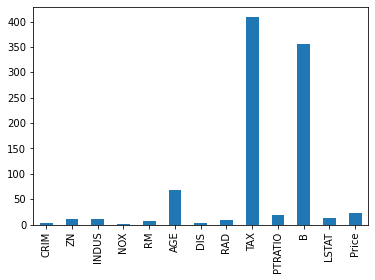

In [19]:
boston_data.describe().loc["mean"].plot.bar()
plt.show()

In [20]:
des= pd.DataFrame(boston_data.describe())

In [21]:
des.drop(index= "count", axis= 1, inplace= True)
des.head(1)

CRIM         ZN      INDUS       NOX        RM        AGE       DIS  \
mean  3.613523  11.363636  11.136797  0.554696  6.284636  68.574921  3.795043   

           RAD         TAX    PTRATIO           B      LSTAT      Price  
mean  9.549407  408.237152  18.455584  356.674561  12.653064  22.532806

In [22]:
des.iplot(kind= "box", margin= (0,0,0,0), bestfit= True, keys= [x for x in des.columns if x not in ["TAX","B", "CHAS", "AGE"]])

In [23]:
des.iplot(kind= "box", margin= (0,0,0,0), bestfit= True, keys= [x for x in des.columns if x in ["TAX","B", "AGE"]])

<b> Note:</b>
    
> Researcher has made 2 seperate plots in Plotly since relative values of variables "B", "AGE" and "TAX" are at a higher scale and are high enough to compromise visual identification of other variables.
    
> Values are not to scale hence showing a heavy variation acorss the board in terms of Median and other Quartiles.

<b> Observations:</b>
    
> In ZN variable, number of values in first quartile and median range are more as compared to values between median and 3rd quartile. This implies moer number of houses are located in zones where residential lots are relatively smaller.
    
> INDUS box shows more nubmer of houses are located in the region where proportion of non retail business is more. This could mean relatively less number of housing units in closer proximity to shopping areas.
    
> More number of dwellings are in range of 1st quartile to median in terms of number of rooms.
    
> More number of units are located in median to 3rd quartile range of RAD (Accessibility to Radial highways) which implies more units are closer to Radial Highways.
    
> More number of units are located in area where Pupil Teacher Ratio is between 1st Quartile and Median.
    
> More number of data values located in first quartile and Median values indicating most of the houses are priced 11.2 to 21.2 M USD range.
    
> AGE box shows most of the houses are exist for the past 32 to 68 years range, oldest house is 100 years old and youngest one is less then 3 year old.
    
> Most of the Tax values are plotted between Median and 3rd Quartile range indicating most people pay higher then median value tax per $ 10,000 house value.

> Proportion of people with colour is more in first quartile and median range. ie, there are very few places where the proportion of people with color tend to be beyond 373/ 1000 people population

## OBJECTIVE 1.1:

### Study of relationship between "Price" and other variables

In [24]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float32 
 1   ZN       506 non-null    float32 
 2   INDUS    506 non-null    float32 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float32 
 5   RM       506 non-null    float32 
 6   AGE      506 non-null    float32 
 7   DIS      506 non-null    float32 
 8   RAD      506 non-null    float32 
 9   TAX      506 non-null    float32 
 10  PTRATIO  506 non-null    float32 
 11  B        506 non-null    float32 
 12  LSTAT    506 non-null    float32 
 13  Price    506 non-null    float32 
dtypes: category(1), float32(13)
memory usage: 26.4 KB


### The Big Picture

In [25]:
boston_data["CHAS"]= boston_data["CHAS"].astype("float32")

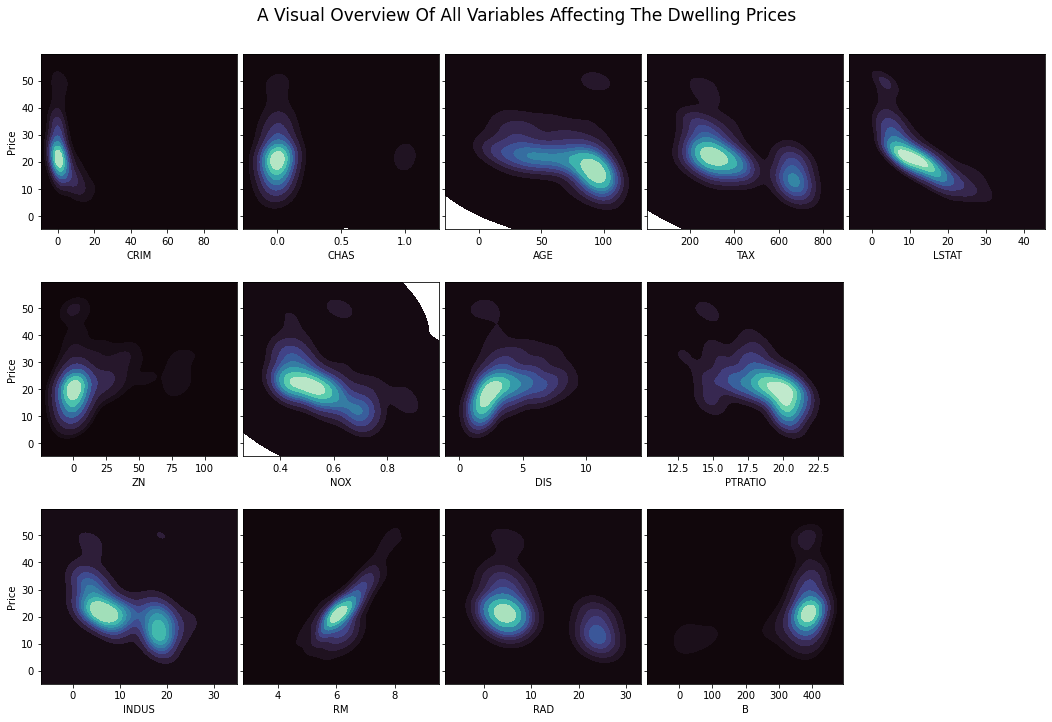

In [26]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("A visual overview of all variables affecting the dwelling prices".title(), fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.03, hspace= 0.3)
fig.delaxes(ax[1,-1])
fig.delaxes(ax[-1,-1])

k= 0
for i in range(6):
    for j in range(3):
        if k< 13:
            sns.kdeplot(ax= ax[j,i], y= boston_data["Price"], x= boston_data[boston_data.columns[k]], data= boston_data, fill= True, cmap= "mako", thresh= 0)
        k+=1

plt.show()

### Going Granular: Determining Correlation Coefficients of all variables

In [27]:
var_corr= boston_data.corr()

In [28]:
var_corr.size

196

In [29]:
var_corr.shape

(14, 14)

In [30]:
var_corr

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355502  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
Price   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     Price  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355502  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
Price    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

<b> NOTE:</b>
    
> A 14x 14 matrix was created with total 196 values. Each entry in the matrix is a correlation coefficient (Pearson Correlation) of row with that of column.
    
> This will enable us to pickup the higher correlation values of various variables with that of Price.

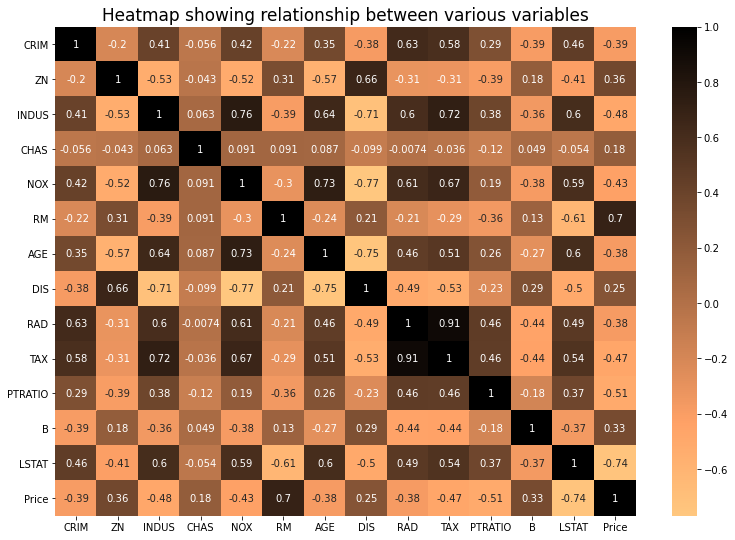

In [31]:
fig, ax= plt.subplots(figsize= (13,9))
sns.heatmap(var_corr, annot= True, annot_kws= {"size": 10}, cmap= "copper_r").set_title("Heatmap showing relationship between various variables", fontsize= 17)
plt.show()

In [32]:
var_corr.iplot(kind= "heatmap", margin= (0,0,0,0), colorscale= "spectral")

## OBJECTIVE 1.2

### Identifying variables that significantly impact house pricing

### Variable Identification

In [33]:
features= [heading for heading in var_corr.index]
corelations= [value for value in var_corr["Price"]]

major_pos_features= {}
major_neg_features= {}

for i in range(len(corelations)):
    if corelations[i] > 0.4:
        major_pos_features[features[i]]= corelations[i]
    elif corelations[i] < -0.4:
        major_neg_features[features[i]]= corelations[i]

del major_pos_features["Price"]

print("Major Positive Impact Features: ")
for k,v in major_pos_features.items():
    print(f"-- {k}: {round(v, 4)}")

print()

print("Major Negative Impact Features: ")
for k,v in major_neg_features.items():
    print(f"-- {k}: {round(v, 4)}")

Major Positive Impact Features: 
-- RM: 0.6954

Major Negative Impact Features: 
-- INDUS: -0.4837
-- NOX: -0.4273
-- TAX: -0.4685
-- PTRATIO: -0.5078
-- LSTAT: -0.7377


<b> NOTE:
    
> Significance value threshold of Pearson Corelation is considered based on Evans (1996):
    
        --abs(0.00-0.19): "Very week"
    
        --abs(0.20-0.39): "Weak"
    
        --abs(0.40-0.59): "Moderate"
    
        --abs(0.60-0.79): "Strong"
    
        --abs(0.80-1.00): "Very Strong"
    
    
> Hence, threshold in our calculation is taken as absolute value of 0.40 and above.

### Deep Dives in variables with significant positive impact on Price

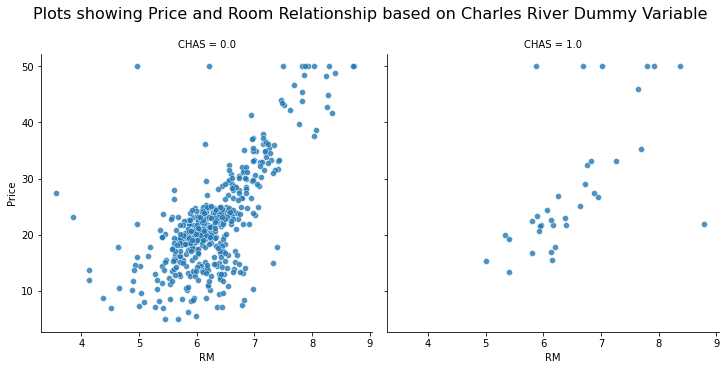

In [34]:
my_plot= sns.relplot(y= "Price", x= "RM", data= boston_data, alpha= 0.8, col= "CHAS")
my_plot.fig.suptitle("Plots showing Price and Room Relationship based on Charles River Dummy Variable", fontsize= 16)
my_plot.fig.subplots_adjust(top= 0.85)
plt.show()

<b> Observations:</b>
    
> Very few housing units are in close proximity to Charles River signifying lower housing density.

> Whether in proximity of river or not, Price of the houses seem to increase in similar trend with increase in number of rooms.

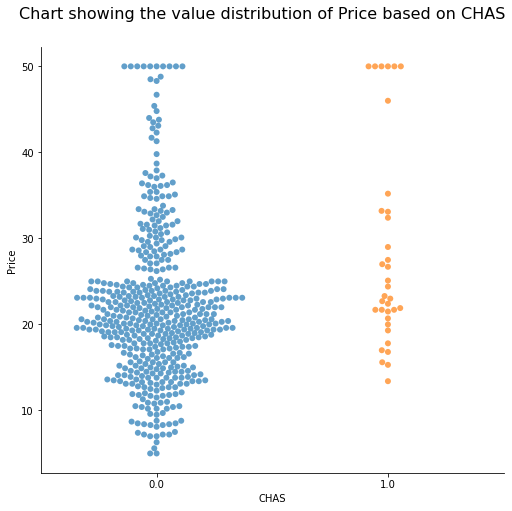

In [35]:
my_plot= sns.catplot(y= "Price", x= "CHAS", data= boston_data, kind= "swarm", alpha= 0.7, s=6, height= 7)
my_plot.fig.suptitle("Chart showing the value distribution of Price based on CHAS", fontsize= 16)
my_plot.fig.subplots_adjust(top= 0.9)
plt.show()

<b> Observations:</b>
    
> Very few housing units are in close proximity to Charles River signifying lower housing density.

> Maximum spread of units further away from Charles River is priced between 15-25 Million USD

> Units in close proximity to Charles River show maximum spread around 23 Million USD mark.

> Following violin plot will give more clarity on this.

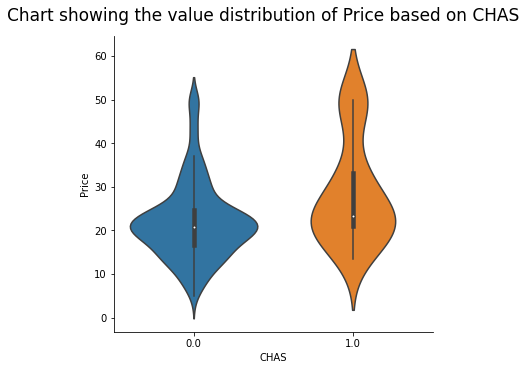

In [36]:
my_plot= sns.catplot(y= "Price", x= "CHAS", data= boston_data, kind= "violin", alpha= 0.5, s=4)
my_plot.fig.suptitle("Chart showing the value distribution of Price based on CHAS", fontsize= 17)
my_plot.fig.subplots_adjust(top= 0.9)
plt.show()

<b> Observations:</b>
    
> Houses closer to the river generally tend to be higher priced then the ones which are farther away.

> Spread of houses further away from the river show an extreme increase in the number of dwelling unit price between 10 and 20 Million price range and similar sharp declien i the average number of units as prices exceed 20 million USD. The peak for the houses in close vicinity to river is at an almost similar mark (Around 23 M USD as against 20 M USD), however, the rise and fall is the number of houses is lot more smoother.

> The most expensive of the dwelling units are located closer to the Charles river.

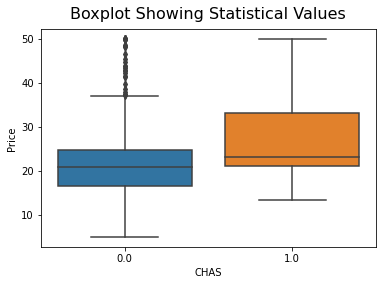

In [37]:
my_plot= sns.boxplot(x= "CHAS", y= "Price", data= boston_data)
my_plot.set_title("Boxplot Showing Statistical Values", fontsize= 16, y= 1.02)
plt.show()

<b> Observations:</b>
    
> Prices of houses closer to Charles River are found to be higher in general with higher value of 1st Quartile, Median and 3rd Quartile. Even the minimum and maximum values are higher if the house is located in close vicinity of Charles River.

> Number of outliers are found to be unusually high in the cases where houses are located further away Charles River. This could possibly affect the predictability of Pricing for properties away from Charles River. Prediction for houses in close proximity of the river could be possibly more dependable.

### Creating and inserting another Categorical variable (Range of avg number of rooms) in our dataset

In [38]:
print("Min: ", boston_data["RM"].min())
print("Max: ", boston_data["RM"].max())

Min:  3.561000108718872
Max:  8.779999732971191


In [39]:
room_range= list(np.linspace(start= round(boston_data["RM"].min()-1), stop= round(boston_data["RM"].max()), num= 4, dtype= int))

def RmRng(row):
    if row["RM"]<= room_range[1]:
        return int(1)
    elif room_range[1] < row["RM"] <= room_range[2]:
        return int(2)
    elif room_range[2] < row["RM"] <= room_range[3]:
        return int(3)

In [40]:
boston_data["RM_RANGE"]= boston_data.apply(RmRng, axis= 1)

In [41]:
boston_data.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.199997  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.900002  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.099998  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.799999  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.200001  6.0622  3.0  222.0   

     PTRATIO           B  LSTAT      Price  RM_RANGE  
0  15.300000  396.899994   4.98  24.000000         2  
1  17.799999  396.899994   9.14  21.600000         2  
2  17.799999  392.829987   4.03  34.700001         3  
3  18.700001  394.630005   2.94  33.400002         2  
4  18.700001  396.899994   5.33  36.200001         3

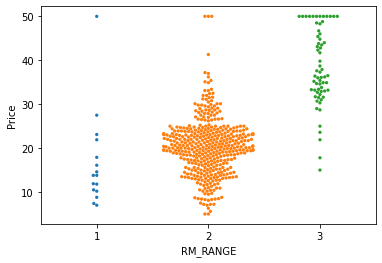

In [42]:
sns.swarmplot(x= "RM_RANGE", y= "Price", data= boston_data, size= 3.3)
plt.show()

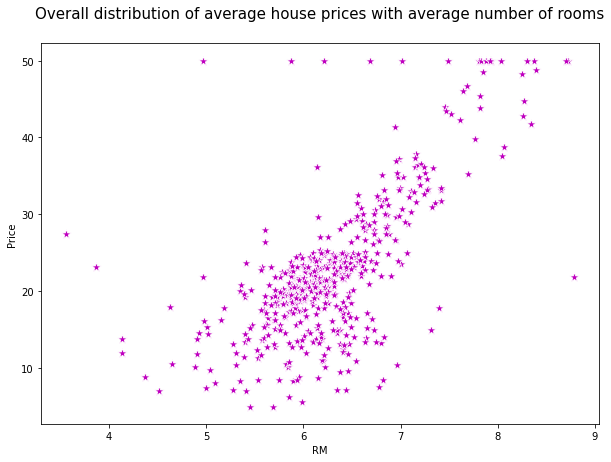

In [43]:
fig, my_plot= plt.subplots(figsize= (10,7))
my_plot= sns.scatterplot(x="RM", y="Price", data= boston_data, color= "m", s= 100, marker= "*")
my_plot.set_title("Overall distribution of average house prices with average number of rooms", y= 1.05, fontsize= 15)
plt.show()

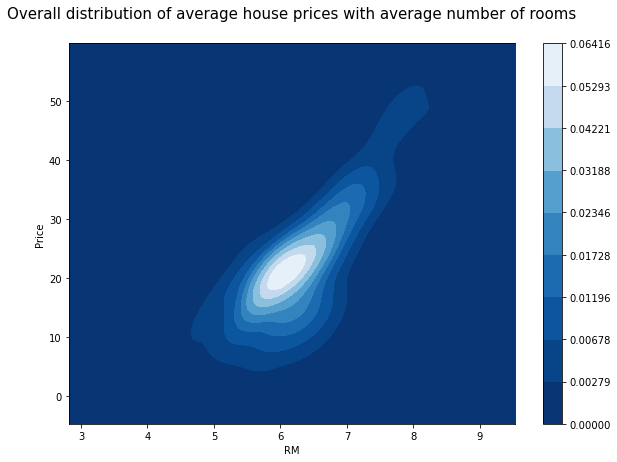

In [44]:
fig, my_plot= plt.subplots(figsize= (10,7))
my_plot= sns.kdeplot(x= "RM", y= "Price", data= boston_data, fill= True, cbar= True, color= "m", cmap= "Blues_r", thresh= 0)
my_plot.set_title("Overall distribution of average house prices with average number of rooms", y= 1.05, fontsize= 15)
plt.show()

<b> Observations:</b>
    
> Most of the dwellings seem to have between 5.75 and 6 average number fo rooms

> Housing units in such dwellings are found to be 18 to 25 M USD.

> The Kernel Density Estimation seem to be directly proportional to number of rooms, ie, with increase in number of rooms, the Price seems to increase.

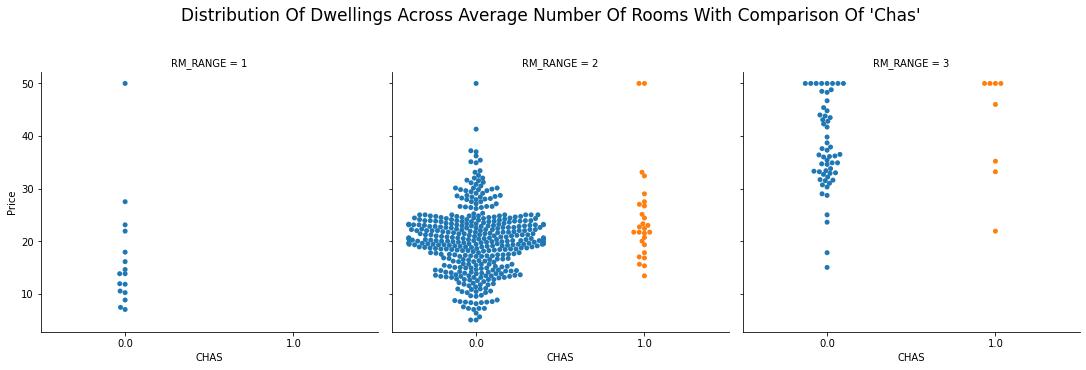

In [45]:
my_plot= sns.catplot(x= "CHAS", y= "Price", data= boston_data, col= "RM_RANGE", kind= "swarm")
my_plot.fig.suptitle("Distribution of dwellings across average number of rooms with comparison of 'CHAS'".title(), fontsize= 17)
my_plot.fig.subplots_adjust(top= 0.8)
plt.show()

<b> Observations:</b>
    
> <b>Less then an average of 5 rooms:<b> 
    
        -- Dwelling units in closer proximity of Charles River are relatively larger (With none of them having less then an average of 5 rooms in them.

        -- Even further away from Charles River, such units are extremely limited.
    
        -- Pricing of such units start from close to 5 M USD with maximum spread between 10 to 15 M USD.
    
        -- Surprisingly, some of the properties in this segment cost more expensive too especially one which manages to reach upto 50 M mark.
    
> <b>Average number of rooms between 5 and 7:<b> 
    
        -- The city has maximum number of units in this range.

        -- If located away from Chares River, these units start to cost below 5M mark and shows a crest around 8 M mark, an incremental sharp "jerk" at 15 M mark and an extreme high frequency at 20 M mark before falling steeply post 25 M mark.
    
        -- If located closer to Charles River, the rise and fall of number of properties is much smoother. Although the number is lesser (Hence - A lower base value for comparison), however, a slight rise in number of dwellings observed within range of 14 to 18 M. Number of units seem to be maximum between the range of 20 to 24 M pricetag.
    
> <b>Average number of rooms above 7:<b> 
    
        -- Pricing for such units start from 15 M but really gains momentum within a range of 32 to 40 M. It falls and rises again to reach a second peak between 42 to 45 M.
    
        -- Multiple such units observed beyond 50M pricetag.

### Deep Dives in variables with significant negative impact on Price

In [46]:
neg_impact_df= pd.DataFrame(data= np.arange(len(boston_data))) ## Prepared a DF for negative impacting significant variables

for x in major_neg_features.keys():
    neg_impact_df[x]= boston_data[x]

neg_impact_df.reset_index(drop= True, inplace= True)
neg_impact_df.drop(columns= 0, inplace= True)
neg_impact_df["PRICE"]= boston_data["Price"]

<b> NOTE:</b>
    
> A seperate DataFrame is created above that includes values of variables that are significant in affecting the price of house.

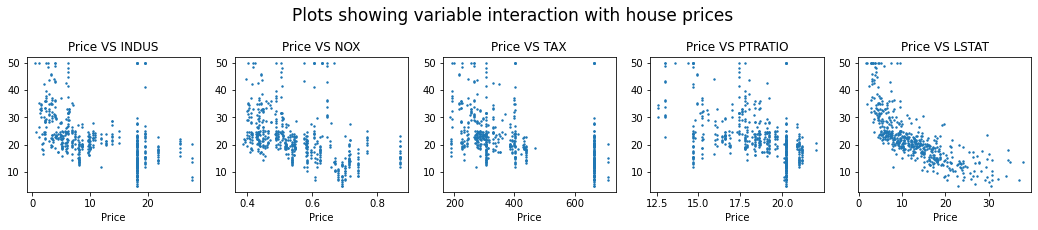

In [47]:
fig, ax= plt.subplots(nrows= 1, ncols= 5, figsize= (18, 3))
fig.suptitle("Plots showing variable interaction with house prices", fontsize= 17)
fig.subplots_adjust(top=0.75)

for i in range(len(neg_impact_df.columns)-1):
    ax[i].scatter(x= neg_impact_df.iloc[:,i], y= neg_impact_df.iloc[:,-1], s=2)
    ax[i].set_xlabel("Price")
    ax[i].set_title(f"Price VS {neg_impact_df.columns[i]}")
plt.show()

<b> Observations:</b>
    
> Price seems to increase with drop in number of non retail businesses in the vicinity. This shows a higher possible demand for houses in closer proximity to retail areas.

> Price seems to increase with fall in pollution (Nitrous Oxide ppm levels in air).

> Price for the properties attracting lesser tax is more.

> Price increases with decrease in Pupil Teacher Ratio. This cold also be because the teachers dont seem to purchase/ reside in costly houses/ homes.

> Prominent increase in price with decrease in the proportion of lower status of population. Hence, dwelling units in relatively poorer neighbourhoods are cheaper.

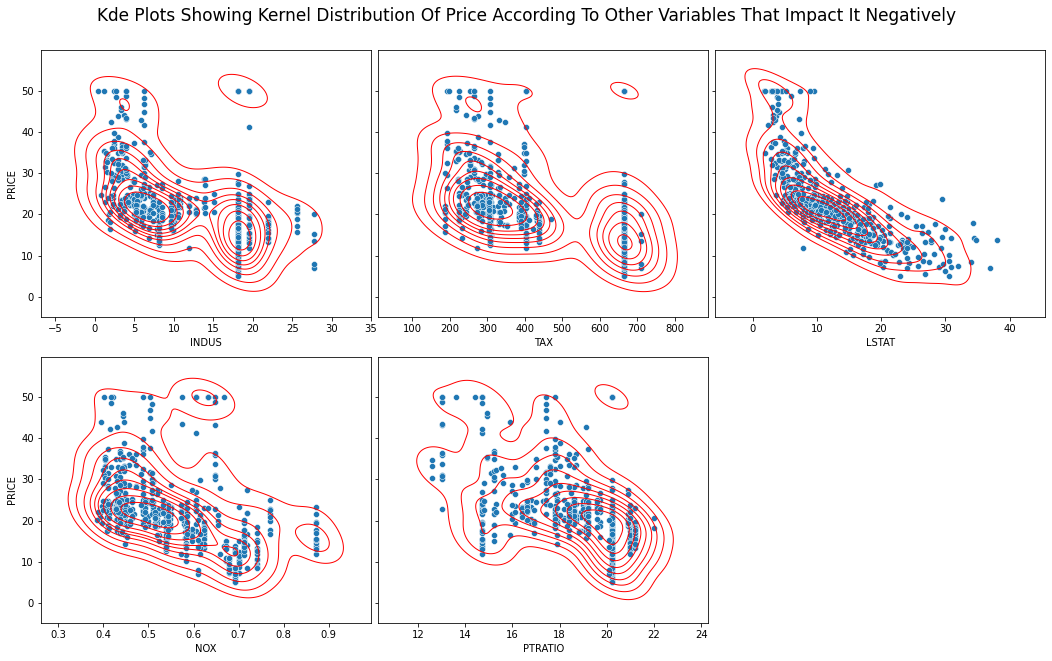

In [48]:
fig, ax= plt.subplots(nrows= 2, ncols= 3, figsize= (18,10), sharey= True)
fig.delaxes(ax[1,2])
fig.suptitle("KDE Plots Showing Kernel Distribution Of Price According To Other Variables That Impact It Negatively".title(), fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.02, hspace= 0.15)

k= 0
for i in range(3):
    for j in range(2):
        if k< 5:
            sns.kdeplot(ax= ax[j,i], y= neg_impact_df["PRICE"], x= neg_impact_df[neg_impact_df.columns[k]], color= "r", linewidths= 1)
            sns.scatterplot(ax= ax[j,i], y= neg_impact_df["PRICE"], x= neg_impact_df[neg_impact_df.columns[k]])
            
        k+=1

plt.show()

<b> Observations:</b>

> Dwelling units pricing in the range 18 to 25 M USD. 
    
> INDUS: Double peaks noticed on Kernel Density. The most dense Price range of dwelling units is found to be most dense in the range 4 to 8% of non retail businesses in the vicinity. Second peak is observed between 17 to 20% proportion where more units are found to be concentrated. 

> TAX: This variable shows double peaks as well with maximum density Pricing between 250-350 USD Taxation / 10,000 USD. The second peak is much further away in the range of 650-700 USD tax/ 10,000 USD.

> LSTAT: Very obvious inversely proportional relationship observed. The most dense Price range is found to lie in the range 8 to 14 % of area population for lower societal status.

> NOX: Most dense price range observed to be staying in areas with pollution levels from NOX in the range of 0.45 to 0.57 ppm.

> PTRATIO: Most dense price range found to be in the regions where Pupil Teacher ratio is between 19 and 21.

## Objective 2: 

### Price-Range Predictions Using Regression Line

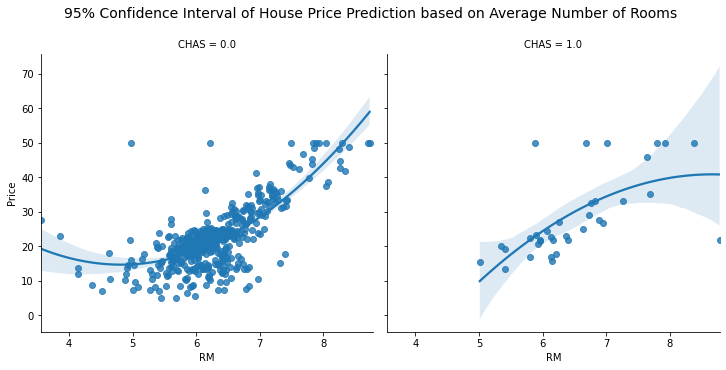

In [49]:
my_plot= sns.lmplot(x= "RM", y= "Price", data= boston_data, col= "CHAS", order= 2)
my_plot.fig.suptitle("95% Confidence Interval of House Price Prediction based on Average Number of Rooms", fontsize= 14)
my_plot.fig.subplots_adjust(top= 0.85)
plt.show()

<b> Observations:</b>

> The shaded area shows the prediction of Prices of home based on average number of rooms in dwellings with a Confidence Interval (CI) of 95%. 
    
> Pricing prediction is done on the basis of 2 factors of CHAS being 1 or 0.

> As per above, the price prediction range of houses in the vicinity of Charles River is much more spread out then as compared to the units further away from Charles river.

In [50]:
boston_data["CHAS"]= boston_data["CHAS"].astype("float32")

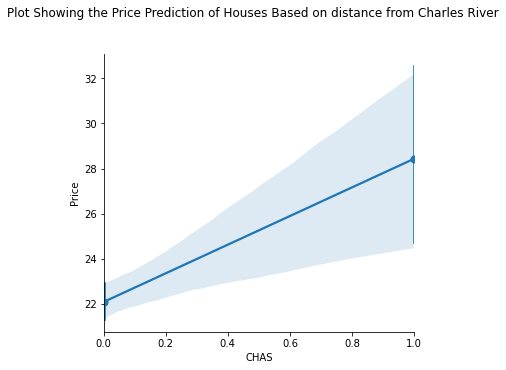

In [51]:
my_plot= sns.lmplot(x= "CHAS", y= "Price", data= boston_data, x_estimator= np.mean)
my_plot.fig.suptitle("Plot Showing the Price Prediction of Houses Based on distance from Charles River", fontsize= 12)
my_plot.fig.subplots_adjust(top=0.85)
plt.show()

<b>Observations:</b>

> ** Upcoming statements do not take into account the number of rooms in the dwellings and gives a general viewpoint. 

> The plot above shows for the dwellings located in vicinity of Charles River are relatively more expensive and prediction range is much higher then that of the houses located much further away.

> The house prices within the vicinity of Charles River are expected to be between 24 and 32 M USD whereas the dwellings further away are predicted to cost between 21 and 23 M USD on an average.

<b>LIMITATIONS:</b>

> Above information is fairly limited since it takes into account only one variable (Average number of rooms in dwellings in Decision Making for Price Prediction). 

> The price predictions are thus fairly skewed since it doesnt include the other significant negative impact variables as indicated before in this report.

> A holistic report will always be "half-done" without using a Machine Learning algorithm. In this case, the ideal scenario will be to run a Linear Regression.

> Although, it is out of the scope of this project to run a linear regression ML model, however, in order to achieve desired information, researcher is applying ML algorithm to draw out the proper prediction and will briefly run through it in the next section without spending too much time on it.

## Objective 3:

### Linear Regression Based Machine Learning Model Development using sklearn metrics to Predict Pricing

#### Importing Relevant Libraries

In [52]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [53]:
ml_df_x= pd.DataFrame(boston.data, columns= boston.feature_names)
ml_df_y= pd.DataFrame(boston.target)

#### Initializing Linear Regression Model

In [54]:
reg= linear_model.LinearRegression()

In [55]:
# 33% of the data will be used as "Testing Data" and rest will be used as "Training Data"
x_train, x_test, y_train, y_test= train_test_split(ml_df_x, ml_df_y, test_size= 0.33, random_state= 12)

#### Training the Model/ Fitting the Model with Training Data

In [56]:
reg.fit(x_train, y_train)

LinearRegression()

In [57]:
# Coefficients for our models:

print(reg.coef_)

[[-1.02895503e-01  5.37745565e-02  6.43565413e-02  3.27276494e+00
  -1.69243449e+01  3.65469340e+00  1.97431930e-02 -1.38095176e+00
   3.12026927e-01 -1.37640229e-02 -7.58831623e-01  1.04465001e-02
  -6.13701665e-01]]


#### Printing predictions on our data sets:

In [58]:
print(reg.predict(x_test))

[[21.98555701]
 [18.48605254]
 [ 6.87047635]
 [30.71919017]
 [33.03135967]
 [21.58169458]
 [20.29391743]
 [38.51139003]
 [33.04417536]
 [26.0763793 ]
 [23.01539288]
 [22.10460838]
 [20.78677188]
 [22.55392962]
 [33.70388643]
 [44.5751137 ]
 [20.71003388]
 [28.78771796]
 [24.05127626]
 [27.75164945]
 [33.84826995]
 [13.45480866]
 [22.6676025 ]
 [12.90812743]
 [25.57467235]
 [21.52632043]
 [20.61789924]
 [14.15439328]
 [26.18945772]
 [38.06844929]
 [26.21996792]
 [27.87762727]
 [17.3509939 ]
 [32.58777871]
 [42.74248685]
 [18.01789639]
 [21.43985809]
 [40.30210042]
 [14.22478757]
 [25.39777713]
 [17.63701671]
 [24.60407003]
 [21.26904128]
 [34.39332673]
 [18.99115615]
 [18.37788431]
 [20.43098083]
 [15.79062497]
 [37.70667306]
 [23.97637744]
 [26.22400219]
 [20.90384137]
 [15.79027956]
 [25.27868263]
 [18.41764875]
 [18.22257437]
 [23.56320938]
 [19.64405901]
 [19.69091588]
 [20.73302816]
 [20.21023406]
 [30.00655518]
 [22.67256373]
 [18.24461465]
 [18.56333191]
 [25.84034871]
 [27.30118

In [59]:
y_pred= reg.predict(x_test)

In [60]:
# Actuial values:

print(y_test)

        0
334  20.7
394  12.7
404   8.5
236  25.1
307  28.2
..    ...
502  20.6
127  16.2
316  17.8
479  21.4
485  21.2

[167 rows x 1 columns]


#### Model Performance Check using sklearn.metrics AND Mean Squared Error Matrix

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
mean_squared_error(y_test, y_pred)

23.849726346176492

#### Model Performance Check using sklearn.metrics r squared score

###### accuracy check from sklearn metrics is not used since the variables are continuous. Hence, as an example, prediction of 119 against actual of  120 does not old "False". Since researcher needs to find "how close the prediction is to actual", he will use r2_score for accuracy check.

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_true= y_test, y_pred= y_pred)

0.712940090405574

#### Predicted Values VS Actual Values (A Visual Confirmation):

In [65]:
len(y_pred) == len(y_test)

True

In [66]:
predictions= []
for var in y_pred.tolist():
    for val in var:
        predictions.append(val)
        
actuals= []
for var in y_test.values.tolist():
    for val in var:
        actuals.append(val)

In [67]:
len(predictions) == len(actuals)

True

In [68]:
for i in range(len(predictions)):
    print(f"Actual_Val: {actuals[i]} || Predicted_Val: {predictions[i]}")

Actual_Val: 20.7 || Predicted_Val: 21.98555701434723
Actual_Val: 12.7 || Predicted_Val: 18.486052541914603
Actual_Val: 8.5 || Predicted_Val: 6.870476350068714
Actual_Val: 25.1 || Predicted_Val: 30.719190167639617
Actual_Val: 28.2 || Predicted_Val: 33.03135966515812
Actual_Val: 22.5 || Predicted_Val: 21.58169457856441
Actual_Val: 18.2 || Predicted_Val: 20.29391742525497
Actual_Val: 43.5 || Predicted_Val: 38.511390027830075
Actual_Val: 36.1 || Predicted_Val: 33.044175355445034
Actual_Val: 23.8 || Predicted_Val: 26.07637930409639
Actual_Val: 22.6 || Predicted_Val: 23.01539288332411
Actual_Val: 22.6 || Predicted_Val: 22.104608378939858
Actual_Val: 22.0 || Predicted_Val: 20.78677188077727
Actual_Val: 22.9 || Predicted_Val: 22.55392962168184
Actual_Val: 35.4 || Predicted_Val: 33.7038864270732
Actual_Val: 50.0 || Predicted_Val: 44.575113698369854
Actual_Val: 17.8 || Predicted_Val: 20.710033879136972
Actual_Val: 24.1 || Predicted_Val: 28.787717964622907
Actual_Val: 21.7 || Predicted_Val: 24.05

In [69]:
my_df= pd.DataFrame(data= list(zip(actuals, predictions)), columns= ["ACTUAL VALUE", "PREDICTED VALUE"])
# my_df["PREDICTED VALUE"]= [x for x in predictions]

my_df.head()

ACTUAL VALUE  PREDICTED VALUE
0          20.7        21.985557
1          12.7        18.486053
2           8.5         6.870476
3          25.1        30.719190
4          28.2        33.031360

In [70]:
my_df.describe()

ACTUAL VALUE  PREDICTED VALUE
count    167.000000       167.000000
mean      23.097605        23.264346
std        9.142387         7.987800
min        7.200000         0.464034
25%       18.050000        18.397767
50%       21.700000        22.104608
75%       24.900000        27.814638
max       50.000000        44.575114

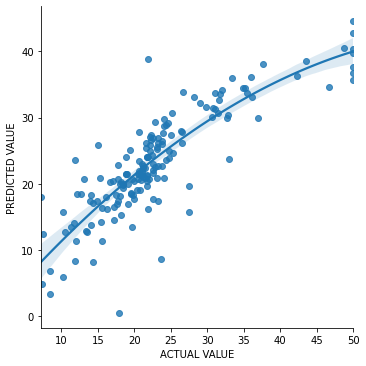

In [71]:
my_plot= sns.lmplot(data= my_df, x= "ACTUAL VALUE", y= "PREDICTED VALUE", order=2)
plt.show()

In [72]:
my_df.iplot(kind= "area", margin= (0,0,0,0), colorscale= "accent", fill= True)

## Objective 4: 

### Inter Variable Dependencies

In [73]:
boston_data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.199997  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.900002  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.099998  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.799999  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.200001  6.0622  3.0  222.0   

     PTRATIO           B  LSTAT      Price  RM_RANGE  
0  15.300000  396.899994   4.98  24.000000         2  
1  17.799999  396.899994   9.14  21.600000         2  
2  17.799999  392.829987   4.03  34.700001         3  
3  18.700001  394.630005   2.94  33.400002         2  
4  18.700001  396.899994   5.33  36.200001         3

<b>NOTE:</b>

> This section will involve:

> Part1: Study of 2 types of "customers" assuming the study is done for a rental/ property sale agency:

            -- People of Color
            -- People from lower status of population
            
> Part2: Furthermore, considering the study being done for real estate agency, following information will be of aumented assistance:

            -- Crime rates study 
            -- Observation on Zones distribution where residential land is zoned for larger lots.
            -- Study of Spread and distribution of Non retail businesses across the city
            -- Location of the dwelling (CHAS value of 0 or 1)
            -- NOS values (Pollution levels PPM)
            -- Average number of rooms in each dwelling unit
            -- Average Distance from 5 Boston Employment Centres
            -- Average Distance from nearest Radial Highways
            -- Average Tax rate
            -- Observations on PT Ratio

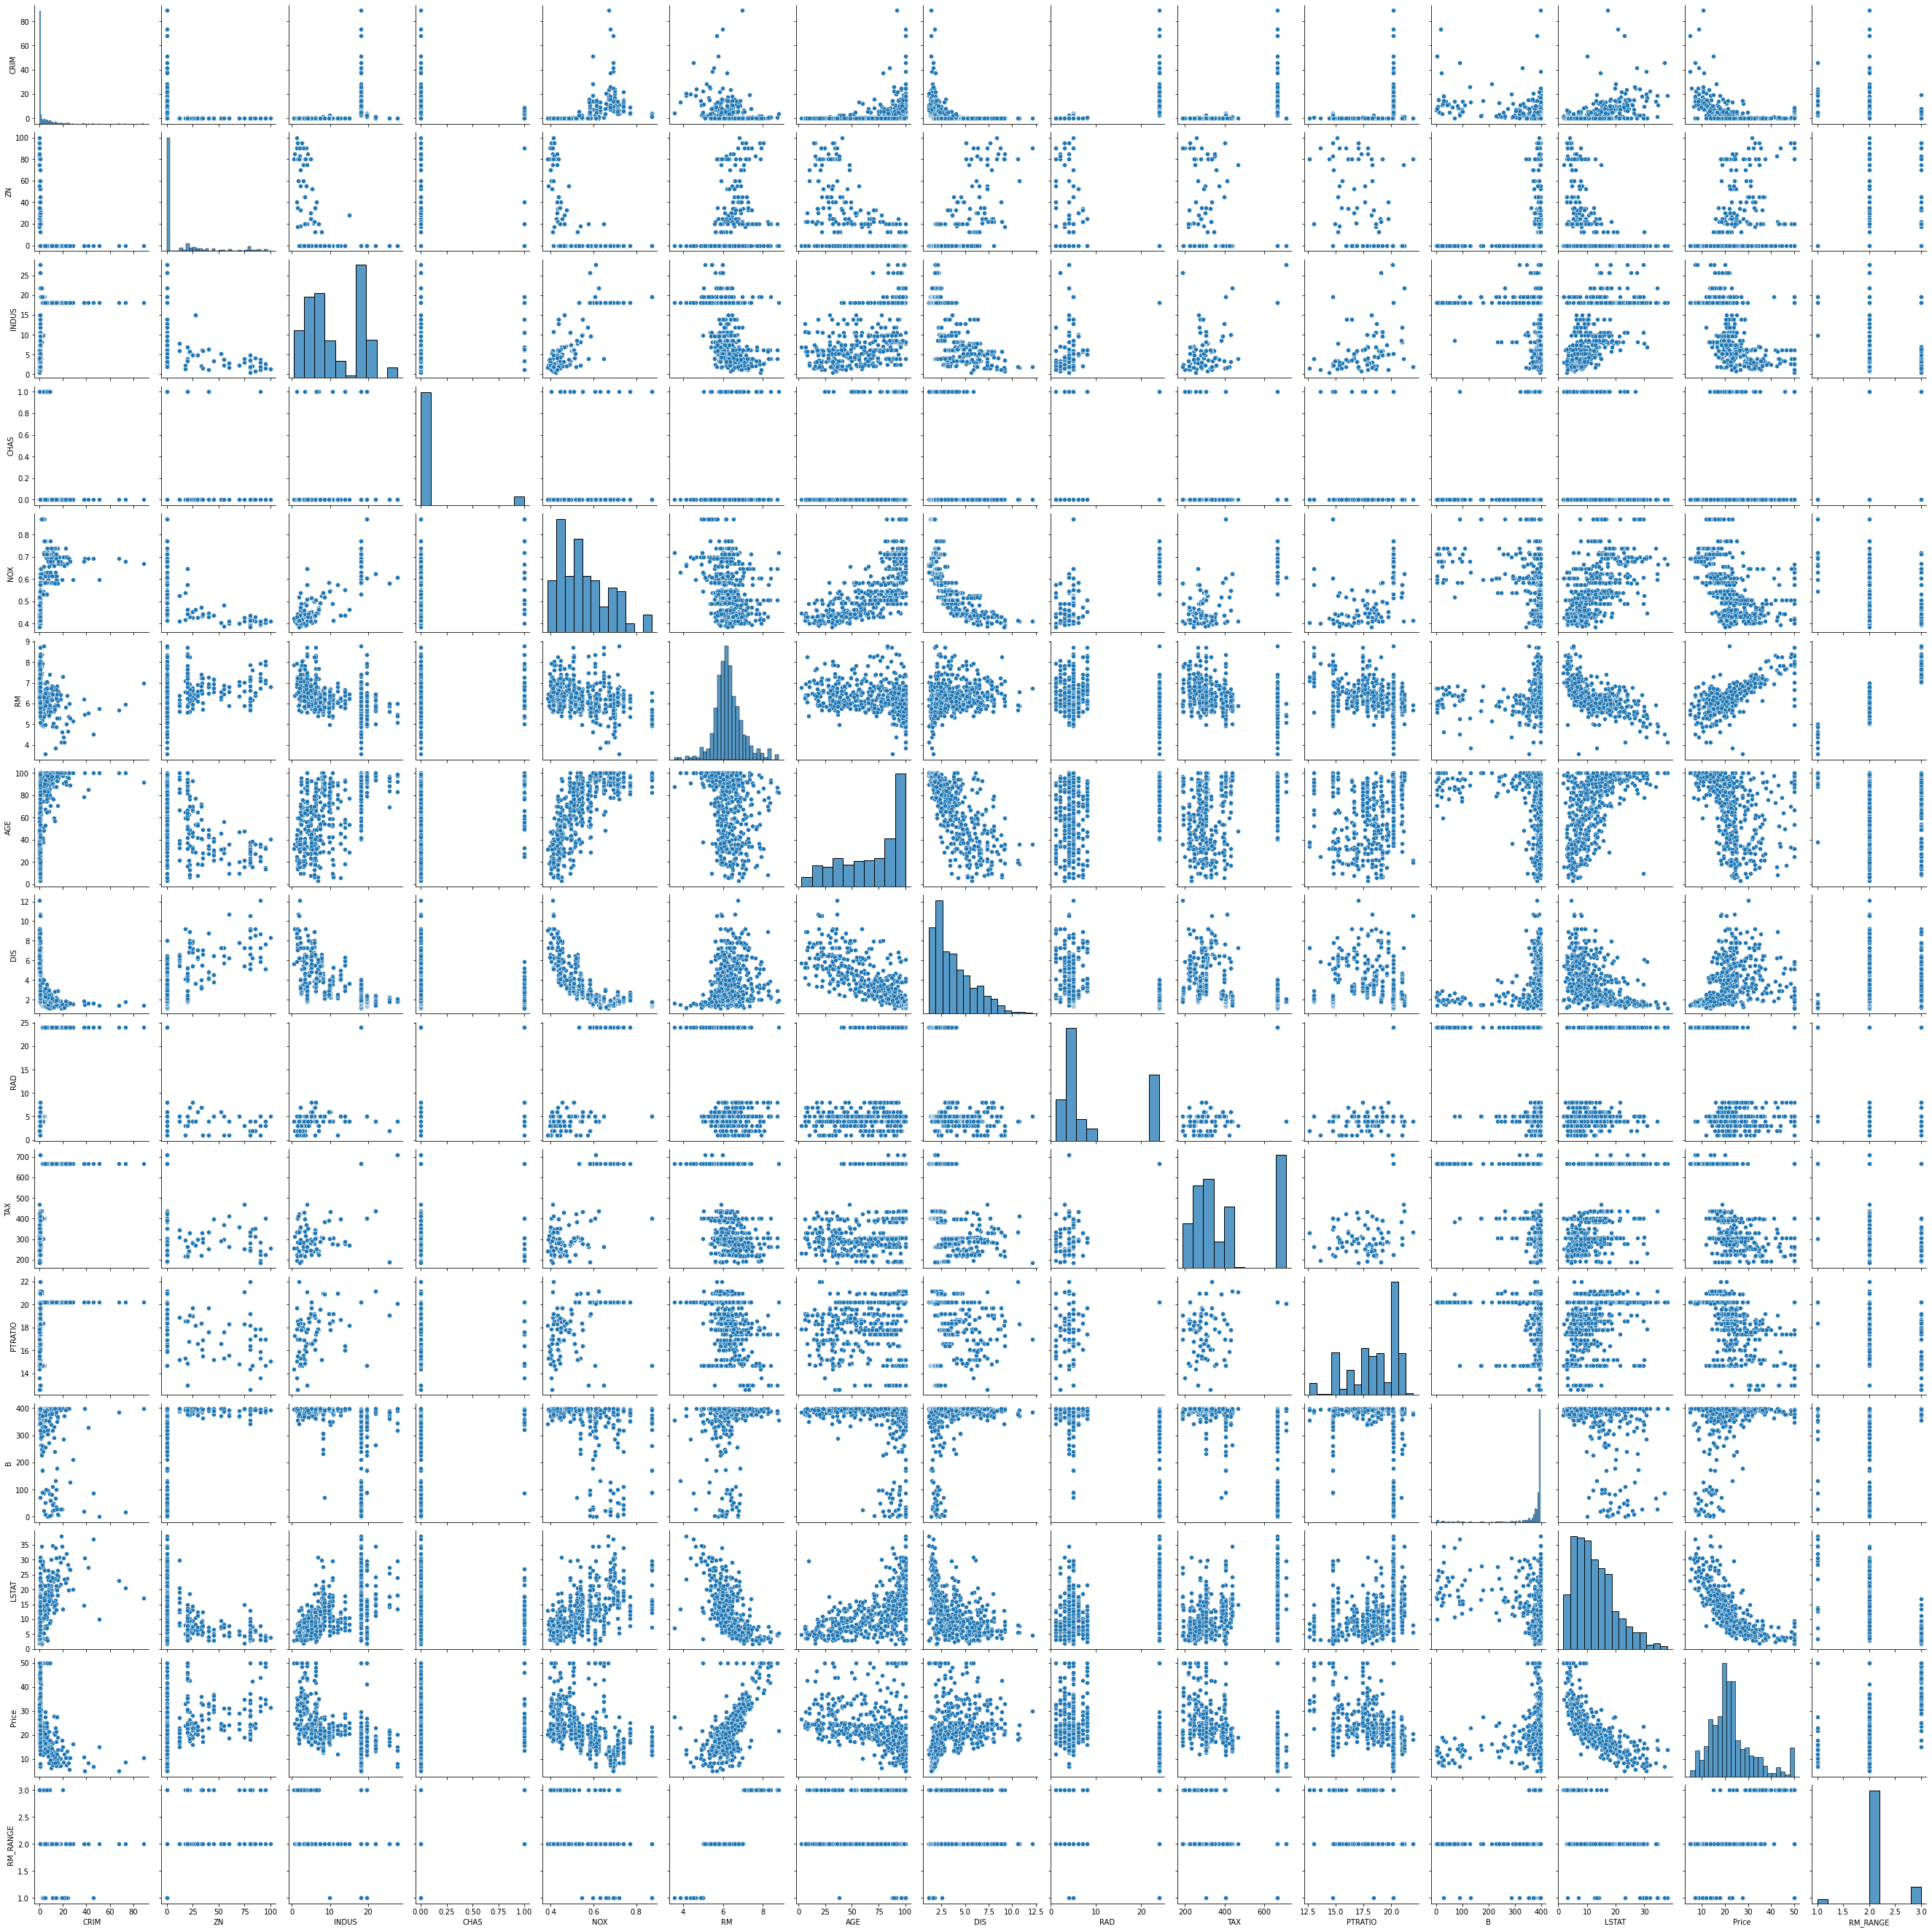

In [74]:
sns.pairplot(boston_data)
plt.show()

## Objective 4.1: 

### Understanding the "Customer Segment": People of Color

#### People of Color

In [75]:
boston_data.head(1)

CRIM    ZN  INDUS  CHAS    NOX     RM        AGE   DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.199997  4.09  1.0  296.0   

   PTRATIO           B  LSTAT  Price  RM_RANGE  
0     15.3  396.899994   4.98   24.0         2

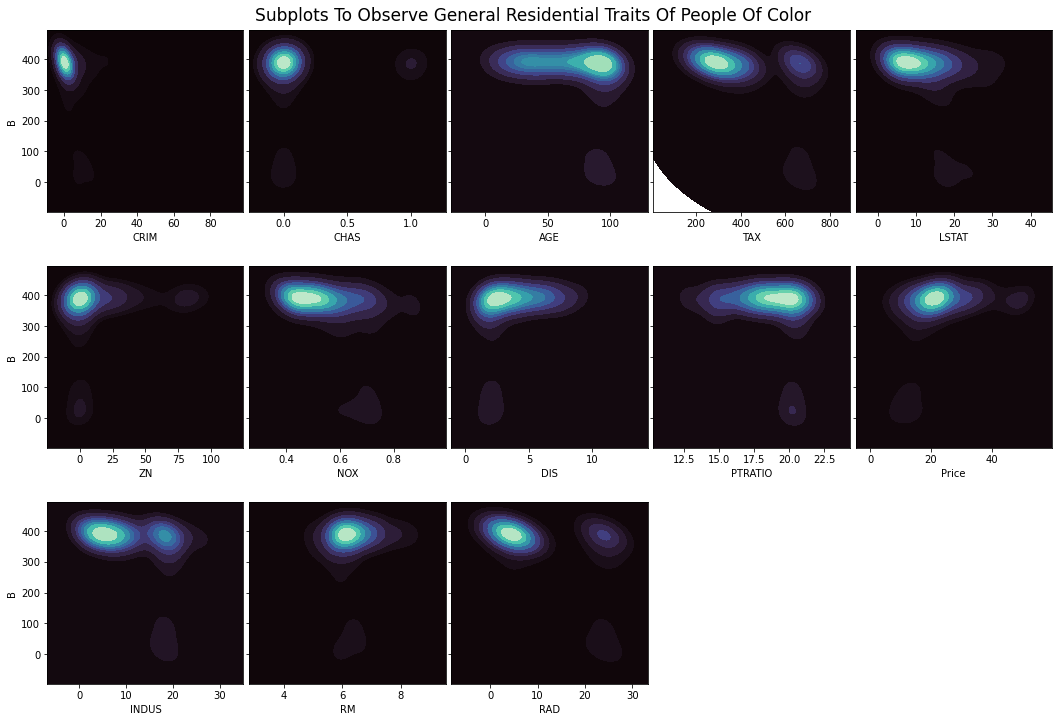

In [76]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("SUBPLOTS TO OBSERVE GENERAL RESIDENTIAL TRAITS OF PEOPLE OF COLOR".title(), fontsize= 17)
plt.subplots_adjust(top= 0.95, wspace= 0.03, hspace= 0.3)
fig.delaxes(ax[2,-1])
fig.delaxes(ax[2,-2])

k= 0
for i in range(6):
    for j in range(3):
        if k< 14 and k!=11:
            sns.kdeplot(ax= ax[j,i], y= boston_data["B"], x= boston_data[boston_data.columns[k]], data= boston_data, cmap= "mako", fill= True, thresh= 0)
        k+=1

plt.show()

In [77]:
# fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
# fig.suptitle("SUBPLOTS TO OBSERVE GENERAL RESIDENTIAL TRAITS OF PEOPLE OF COLOR".title(), fontsize= 17)
# plt.subplots_adjust(top= 0.95, wspace= 0.03, hspace= 0.3)
# fig.delaxes(ax[2,-1])
# fig.delaxes(ax[2,-2])

# k= 0
# for i in range(6):
#     for j in range(3):
#         if k< 14 and k!=11:
#             sns.scatterplot(ax= ax[j,i], y= boston_data["B"], x= boston_data[boston_data.columns[k]], data= boston_data, s= 20)
#         k+=1

# plt.show()

<b>Observations:</b>

> Most of the population of People of Color is concentrated in areas of lower per capita crime rate. Hence, unlike the popular notion, it is not necessary that crime rate will be higher if this proportion of population is higher.

> Most of the people of this community tend to stay away from Charles River. Their is an extremely small proportion of this population closer to the river.

> People of this community tend to be concentrated more towards the locations where we have more proportion of buildings older then 1940's.

> Larger part of this population live in the areas with dwellings where tax rate is between 250 to 350 USD/ 10k. A small proportion is found to be between 650 and 750 tax slab too.

> Major chunk of this population is residing in areas where percent of lower status of population is between 5 to 10 %. Relatively smaller proportions sneak into the higher Lower status % areas. This refutes the general notion that people of color tend to stay closer to the people of lower strata of society.

> Most of the population from this community tends to stay in the areas where proportion of residential land is NOT zoned for larger lots.

> Most of the population is concentrated in the areas where NOX value is between 0.4 to 0.5 PPM

> Most of the population from this community is spread in areas located between 2 to 4 miles from 5 employment centres of Boston.

> The community is concentrated in the areas where Pupil's Teachers ratio is 18.5 and 21.5.

> They mostly tend to stay in the areas where dwellings cost between 19 to 25 M USD.

> The community is highly concentrated in areas where proportion of non retail businesses is between 1 and 8. A small proportion is also found to be located in the area where proportion of these areas is between 18 and 20

> Their concentration is more in dwellings with average number of rooms is between 5.5 and 6.5.

> Most of the concentration of this community is in the area where accessibility index of radial highways is between 1 and 7. A very small concentration is found further away from highways too.

## Objective 4.2:

### Understanding the "Customer Segment": People from lower Strata of Population

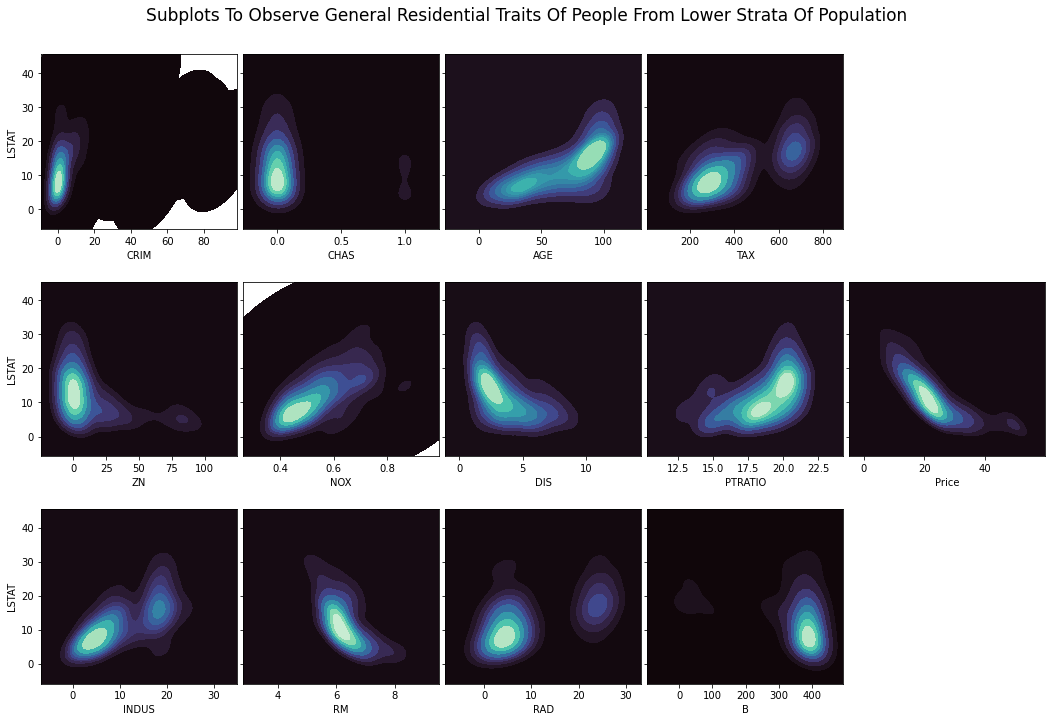

In [78]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("SUBPLOTS TO OBSERVE GENERAL RESIDENTIAL TRAITS OF PEOPLE FROM LOWER STRATA OF POPULATION".title(), fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.03, hspace= 0.3)
fig.delaxes(ax[0,4])
fig.delaxes(ax[2,4])

k= 0
for i in range(6):
    for j in range(3):
        if k< 14 and k!= 12:
            sns.kdeplot(ax= ax[j,i], y= boston_data["LSTAT"], x= boston_data[boston_data.columns[k]], data= boston_data, cmap= "mako", fill= True, thresh= 0)
        k+=1

plt.show()

<b>Observations:</b>

> Population of this community is focussed more in areas with per capita crime rate of close to 0. The concentration tends to decrease but this segment tends to stay upto the zone where per capita crime rate is close to 18-20.

> They stay further away from Charles River with a very minute concentration of population closer to the Charles River

> Concentration of this community clearly seems to increase with the increase in age of dwellings. They tend to stay in the older neighbourhoods.

> Most of them live in dwellings where tax is between 200 to 350 USD/ 10000USD.

> Concentration of their population tends to clearly decrease with increase in proportion of residential land for larger lots.

> Their concentration increases with increase in NOX value but the numbers start to reduce.

> Their numbers decrease with increase in distance from employment centres.

> Their concentration as well as %age tends to increase wtih increase in PT Ratio.

> Their population is inversely proportional to increase in Price.

> With increase in non retail industries, their proportion tends to increase.

> Their presence is inversely proportional to average number of rooms in the dwellings.

## Objective 4.3:

### Exploratory Study of All Intervariable Relationships

In [79]:
boston_data.head(1)

CRIM    ZN  INDUS  CHAS    NOX     RM        AGE   DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.199997  4.09  1.0  296.0   

   PTRATIO           B  LSTAT  Price  RM_RANGE  
0     15.3  396.899994   4.98   24.0         2

#### Study of Crime Rates in Boston:

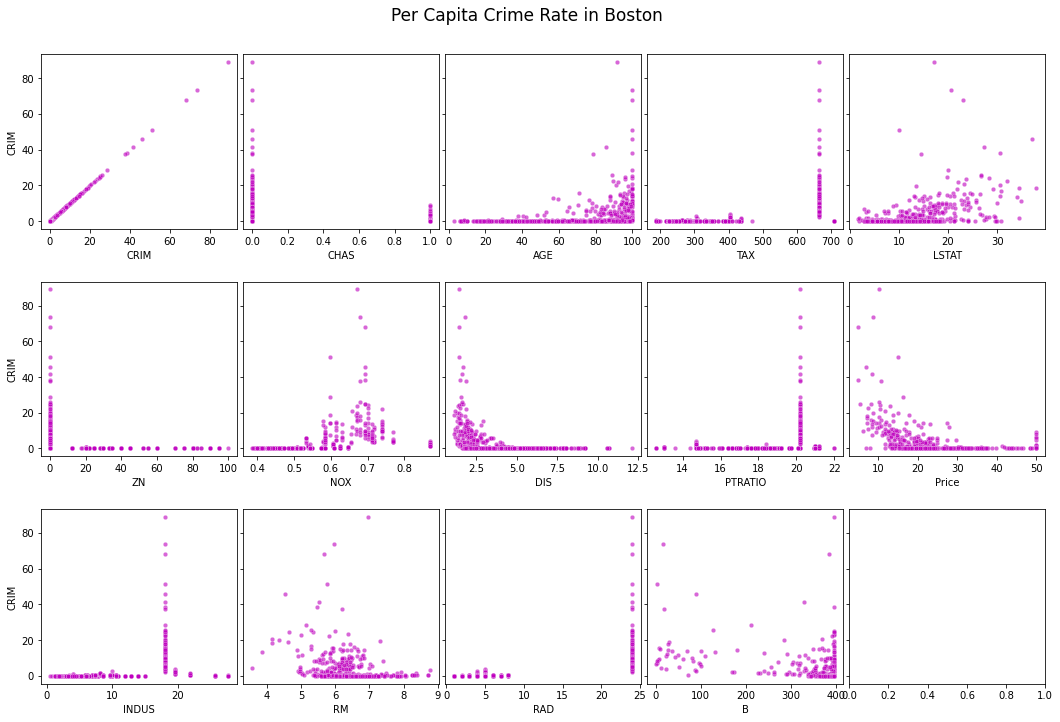

In [80]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("Per Capita Crime Rate in Boston", fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.03, hspace= 0.3)
# fig.delaxes(ax[0,0])
# fig.delaxes(ax[-1,-1])

k= 0
for i in range(6):
    for j in range(3):
        if k< 14:
            sns.scatterplot(ax= ax[j,i], y= boston_data["CRIM"], x= boston_data[boston_data.columns[k]], data= boston_data, alpha= 0.6, s= 20, color= "m")
        k+=1

plt.show()

#### A study of Zones: Proportion of residential area zoned for larger lots

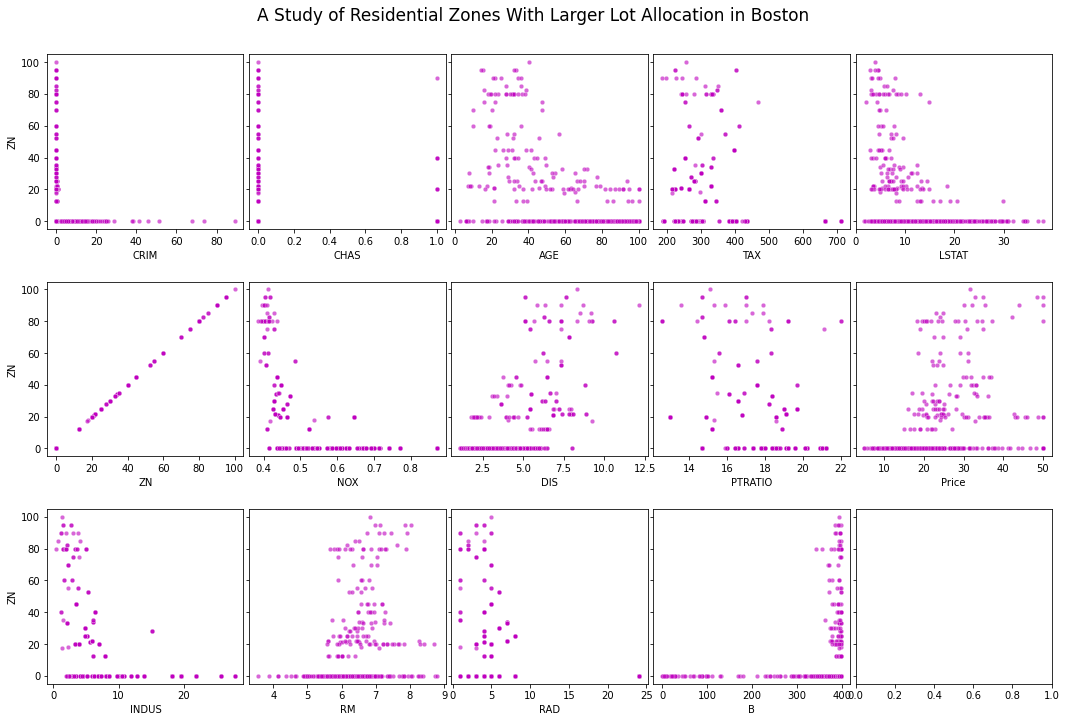

In [81]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("A Study of Residential Zones With Larger Lot Allocation in Boston", fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.03, hspace= 0.3)
# fig.delaxes(ax[0,0])
# fig.delaxes(ax[-1,-1])

k= 0
for i in range(6):
    for j in range(3):
        if k< 14:
            sns.scatterplot(ax= ax[j,i], y= boston_data["ZN"], x= boston_data[boston_data.columns[k]], data= boston_data, s= 20, color= "m", alpha= 0.6)
        k+=1

plt.show()

#### INDUS: A Study on proportion of non retail businesses in the city

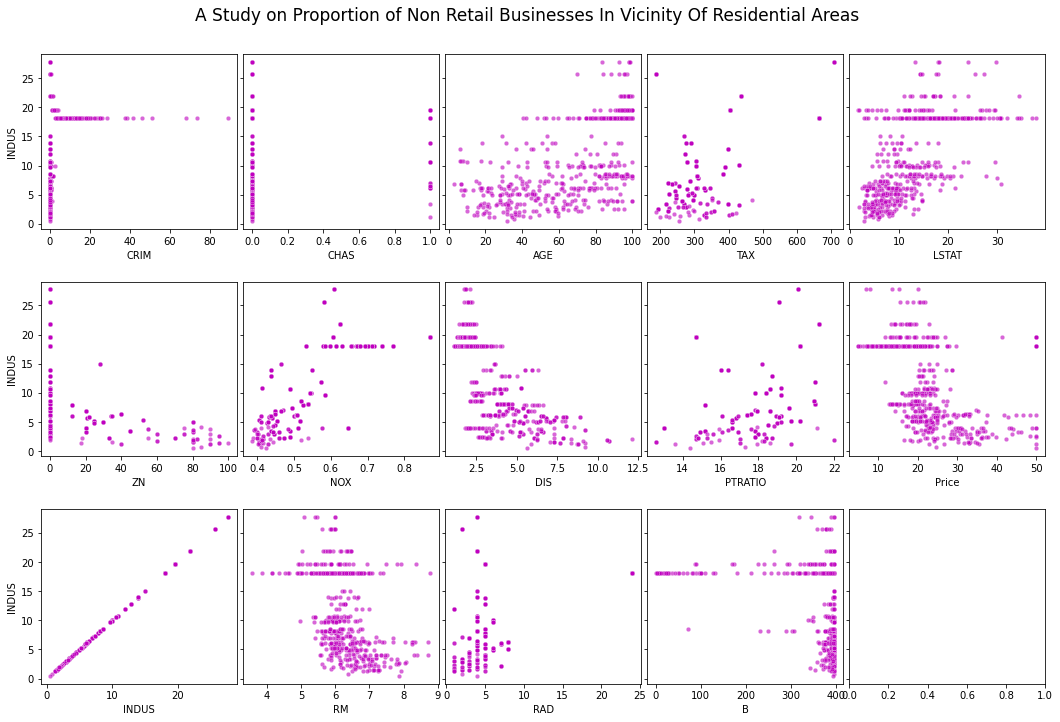

In [82]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("A Study on Proportion of Non Retail Businesses In Vicinity Of Residential Areas", fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.03, hspace= 0.3)
# fig.delaxes(ax[0,0])
# fig.delaxes(ax[-1,-1])

k= 0
for i in range(6):
    for j in range(3):
        if k< 14:
            sns.scatterplot(ax= ax[j,i], y= boston_data["INDUS"], x= boston_data[boston_data.columns[k]], data= boston_data, alpha= 0.6, s= 20, color= "m")
        k+=1

plt.show()

#### CHAS: Identifying Variable Relationships with distance from Charles River

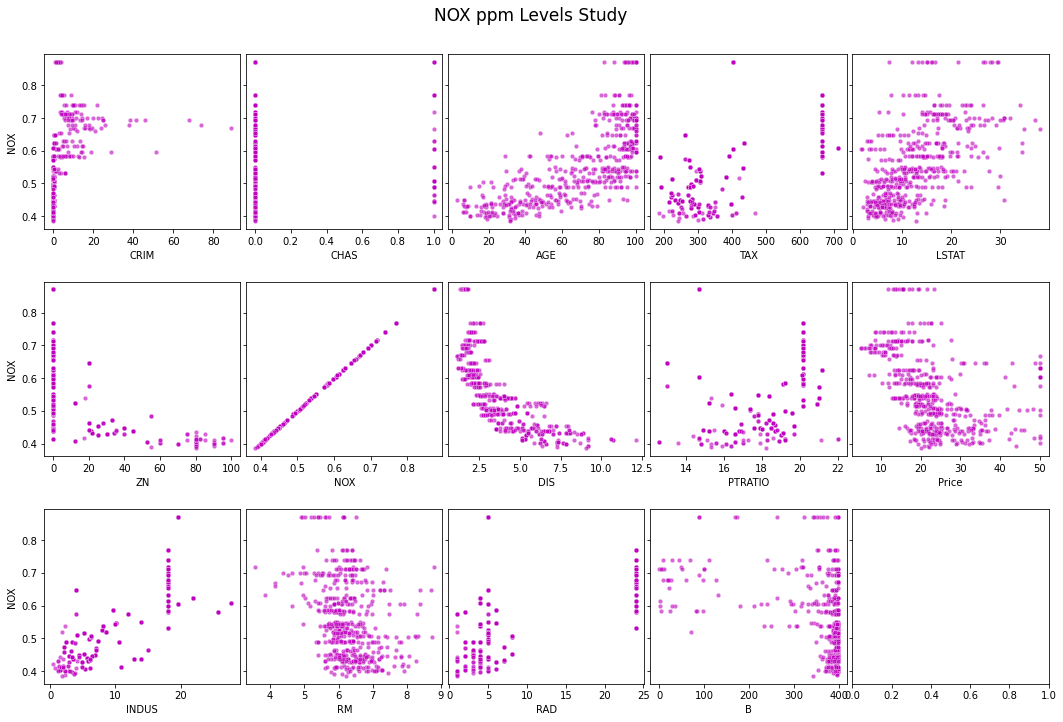

In [83]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("NOX ppm Levels Study", fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.03, hspace= 0.3)
# fig.delaxes(ax[0,0])
# fig.delaxes(ax[-1,-1])

k= 0
for i in range(6):
    for j in range(3):
        if k< 14:
            sns.scatterplot(ax= ax[j,i], y= boston_data["NOX"], x= boston_data[boston_data.columns[k]], data= boston_data, alpha= 0.6, s= 20, color= "m")
        k+=1

plt.show()

#### A Study on Average Number of Rooms

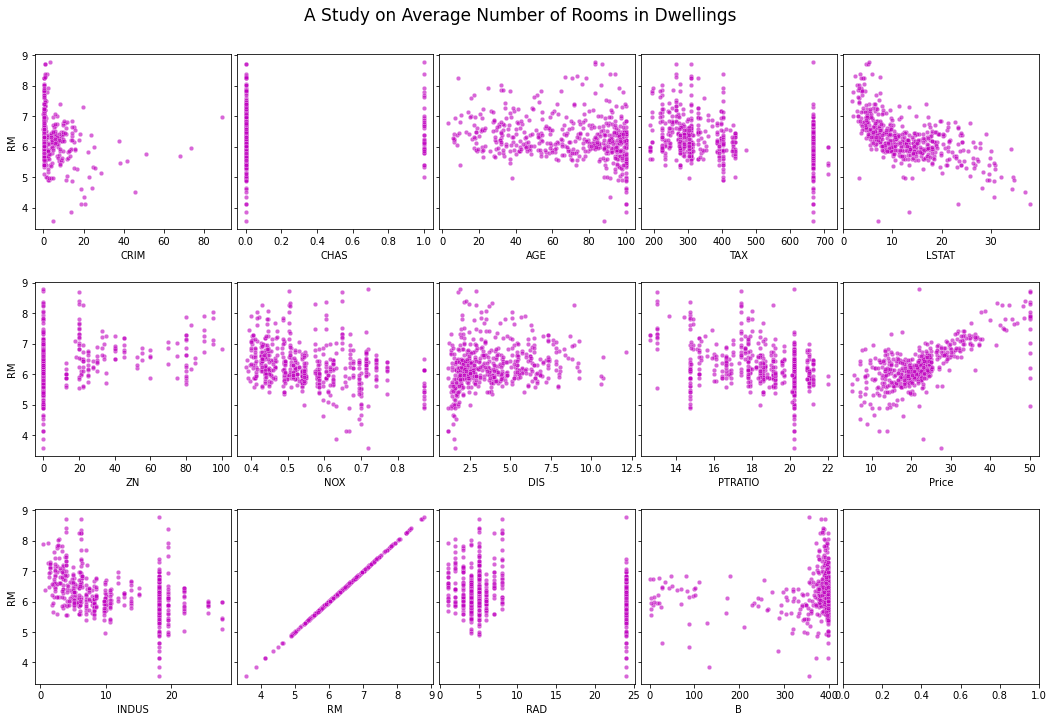

In [84]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("A Study on Average Number of Rooms in Dwellings", fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.03, hspace= 0.3)
# fig.delaxes(ax[0,0])
# fig.delaxes(ax[-1,-1])

k= 0
for i in range(6):
    for j in range(3):
        if k< 14:
            sns.scatterplot(ax= ax[j,i], y= boston_data["RM"], x= boston_data[boston_data.columns[k]], data= boston_data, alpha= 0.6, s= 20, color= "m")
        k+=1

plt.show()

#### A Study on Age of Dwellings (Proportion of Dwellings Made Before 1940's)

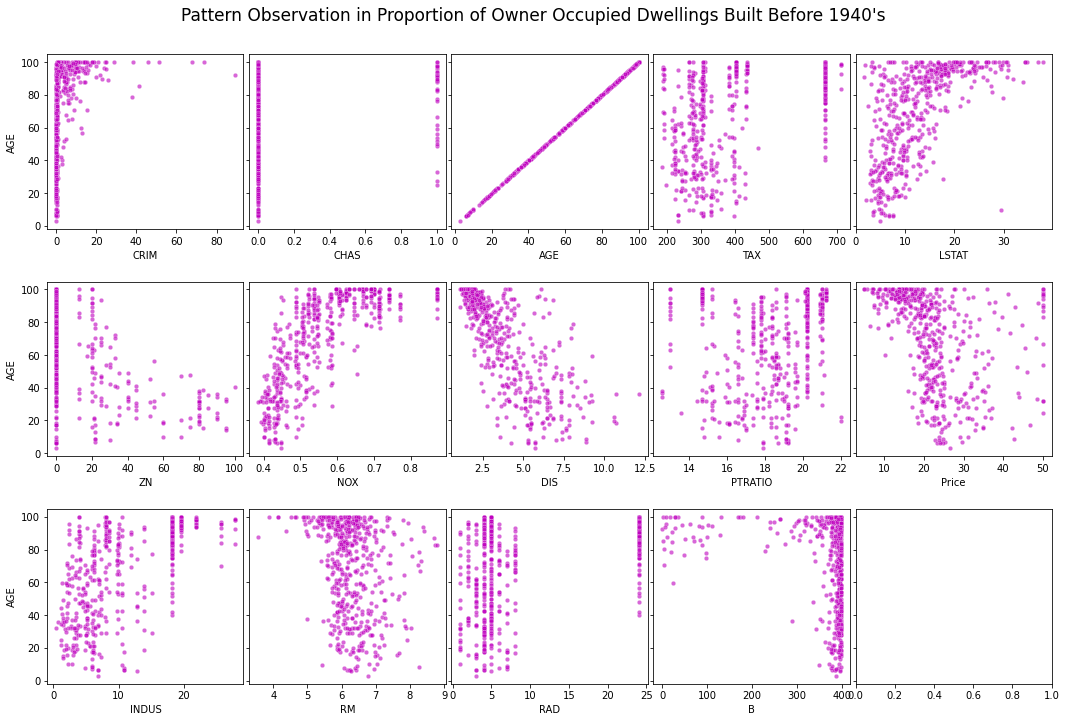

In [85]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("Pattern Observation in Proportion of Owner Occupied Dwellings Built Before 1940's", fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.03, hspace= 0.3)
# fig.delaxes(ax[0,0])
# fig.delaxes(ax[-1,-1])

k= 0
for i in range(6):
    for j in range(3):
        if k< 14:
            sns.scatterplot(ax= ax[j,i], y= boston_data["AGE"], x= boston_data[boston_data.columns[k]], data= boston_data, alpha= 0.6, s= 20, color= "m")
        k+=1

plt.show()

#### Observations on mean distance of Dwellings from 5 employment centres of Boston

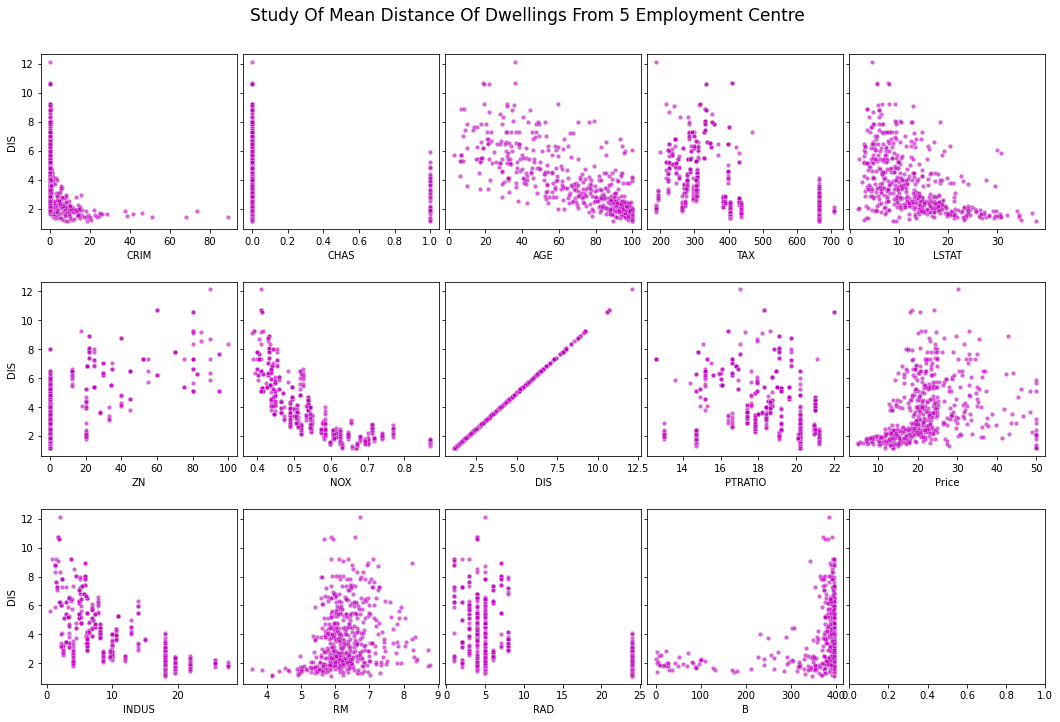

In [86]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("Study of Mean distance of dwellings from 5 employment centre".title(), fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.03, hspace= 0.3)
# fig.delaxes(ax[0,0])
# fig.delaxes(ax[-1,-1])

k= 0
for i in range(6):
    for j in range(3):
        if k< 14:
            sns.scatterplot(ax= ax[j,i], y= boston_data["DIS"], x= boston_data[boston_data.columns[k]], data= boston_data, alpha= 0.6, s= 20, color= "m")
        k+=1

plt.show()

#### Study of dwellings in Boston based on Accessibility index of radial highways

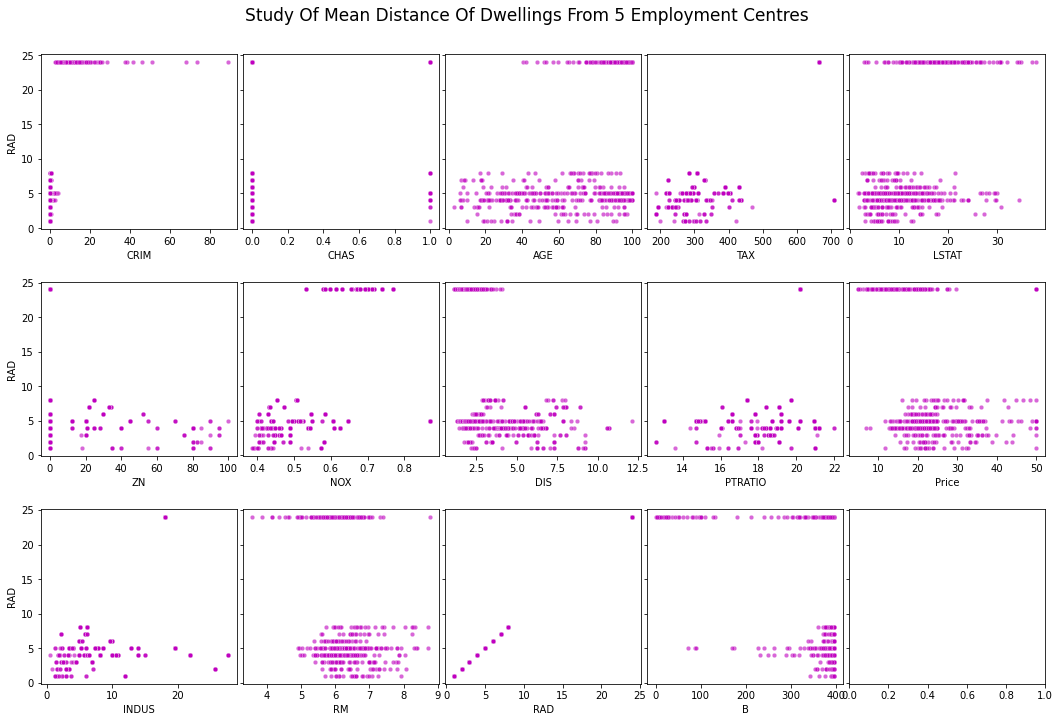

In [87]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("Study of Mean distance of dwellings from 5 employment centres".title(), fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.03, hspace= 0.3)
# fig.delaxes(ax[0,0])
# fig.delaxes(ax[-1,-1])

k= 0
for i in range(6):
    for j in range(3):
        if k< 14:
            sns.scatterplot(ax= ax[j,i], y= boston_data["RAD"], x= boston_data[boston_data.columns[k]], data= boston_data, alpha= 0.6, s= 20, color= "m")
        k+=1

plt.show()

#### Study of dwellings in Boston based on Tax rate per 10,000 USD

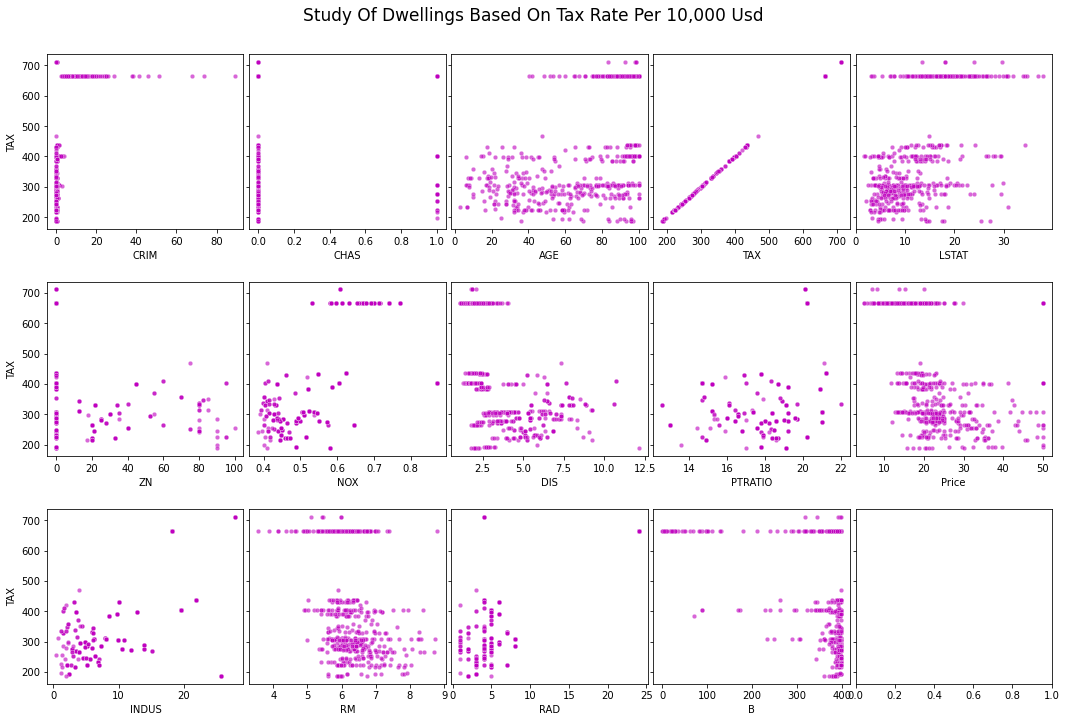

In [88]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("Study of dwellings based on Tax rate per 10,000 USD".title(), fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.03, hspace= 0.3)
# fig.delaxes(ax[0,0])
# fig.delaxes(ax[-1,-1])

k= 0
for i in range(6):
    for j in range(3):
        if k< 14:
            sns.scatterplot(ax= ax[j,i], y= boston_data["TAX"], x= boston_data[boston_data.columns[k]], data= boston_data, alpha= 0.6, s= 20, color= "m")
        k+=1

plt.show()

#### Pupil's Teachers ratio based analysis of dwellings

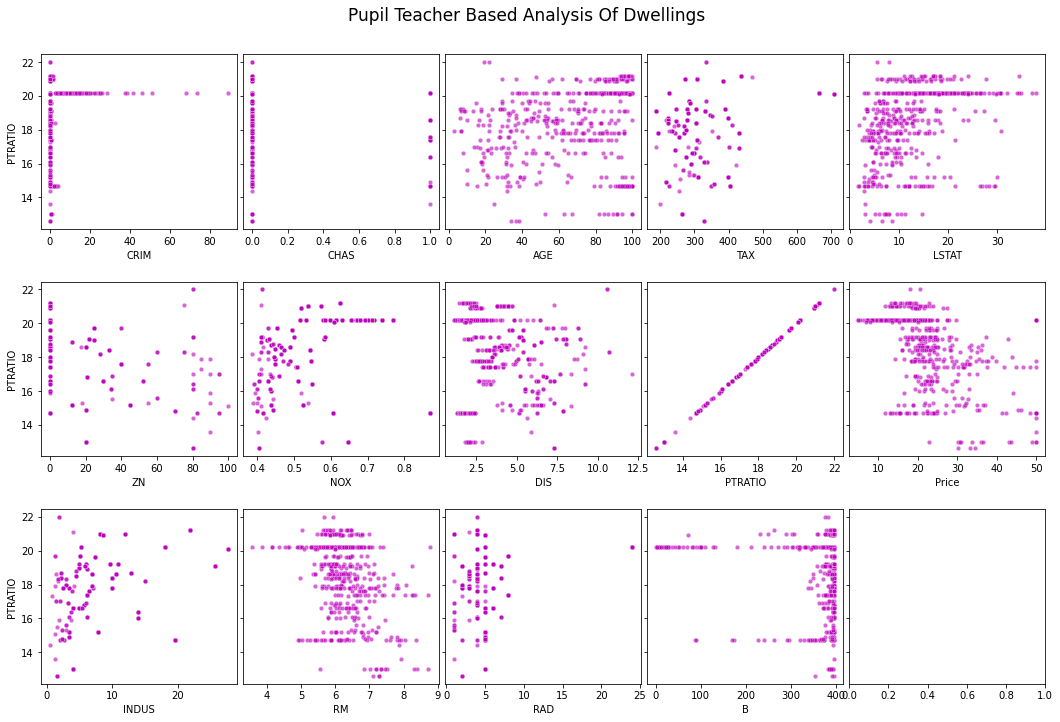

In [89]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("Pupil teacher based analysis of dwellings".title(), fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.03, hspace= 0.3)
# fig.delaxes(ax[0,0])
# fig.delaxes(ax[-1,-1])

k= 0
for i in range(6):
    for j in range(3):
        if k< 14:
            sns.scatterplot(ax= ax[j,i], y= boston_data["PTRATIO"], x= boston_data[boston_data.columns[k]], data= boston_data, alpha= 0.6, s= 20, color= "m")
        k+=1

plt.show()

#### A Price based Study

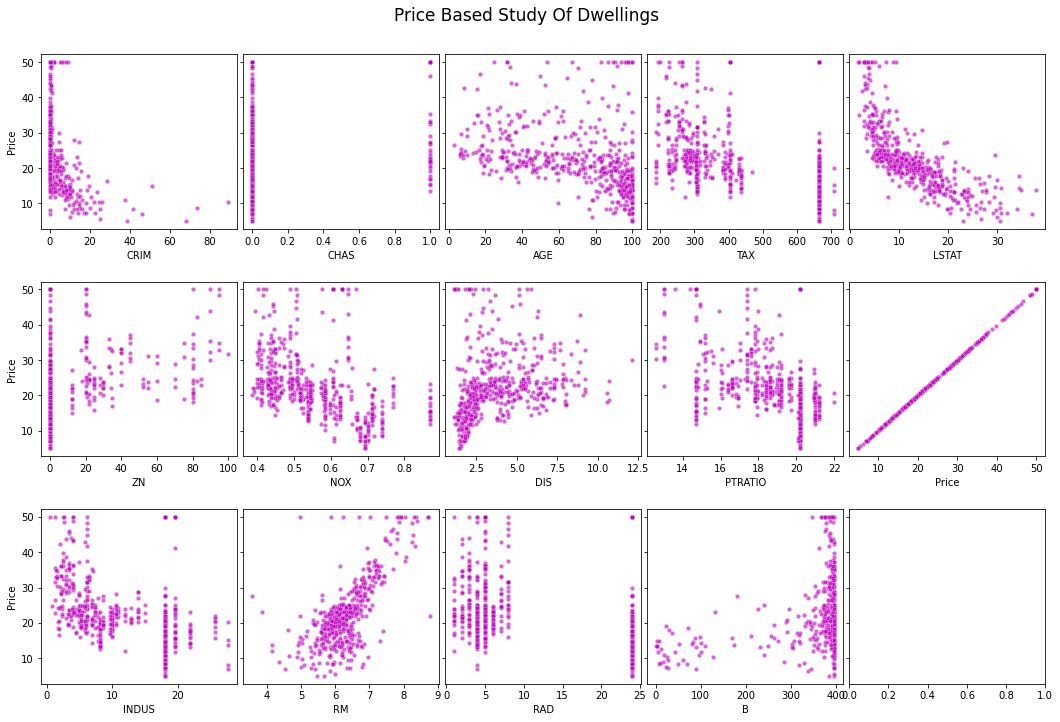

In [90]:
fig, ax= plt.subplots(nrows= 3, ncols= 5, figsize= (18,11), sharey= True)
fig.suptitle("price based study of dwellings".title(), fontsize= 17)
plt.subplots_adjust(top= 0.92, wspace= 0.03, hspace= 0.3)
# fig.delaxes(ax[0,0])
# fig.delaxes(ax[-1,-1])

k= 0
for i in range(6):
    for j in range(3):
        if k< 14:
            sns.scatterplot(ax= ax[j,i], y= boston_data["Price"], x= boston_data[boston_data.columns[k]], data= boston_data, alpha= 0.6, s= 20, color= "m")
        k+=1

plt.show()

In [7]:
l1= [1,8,3,4,5,7,6,2]

print(sorted(l1)[-2])

7